# HW 5 - LDA, VC-Dimensions, Shattering, SVM, Cross-Validation, and Grid Search

1.1 - Structural Risk Minimization: 

__D__ - *We do not need to compute the testing error for each model to perform SRM*

1.2 - Cross-Validation:

__D__ - *a higher k, does not neccessarily lead to a more optimal result*

## Q2 LDA

In [1]:
import numpy as np
from numpy.linalg import inv, norm
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [2]:
def print_latex(mat):
    s = r'\begin{bmatrix}' + '\n'
    for i in range(mat.shape[0]):
        for j in range(mat.shape[1]):
            if j != mat.shape[1] - 1:
                s += '{: .4f} & '.format(mat[i,j])
            else:
                s += '{: .4f} \\\\\n'.format(mat[i,j])
    s += r'\end{bmatrix}'
    print(s)

(2, 100) (2, 100)


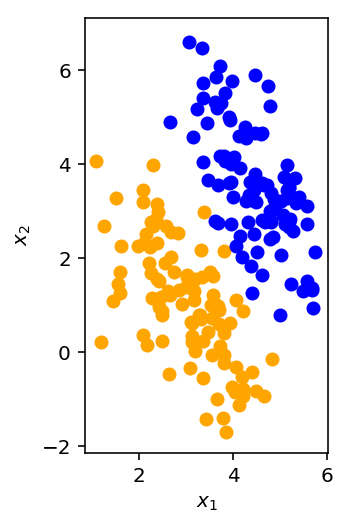

In [3]:
# Load the data and visualize.
Xs = np.load('lda.npy')

X_0 = np.matrix(Xs[:, 0:2]).T  # Shape: (2, 100).
X_1 = np.matrix(Xs[:, 2:4]).T  # Shape: (2, 100).

print(X_0.shape, X_1.shape)
plt.scatter(X_0[0].tolist(), X_0[1].tolist(), color='orange')
plt.scatter(X_1[0].tolist(), X_1[1].tolist(), color='blue')
plt.axis('scaled')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

In [6]:
# (a) Compute mean of each class.
mu_0_0 = X_0[0].mean()
mu_0_1 = X_0[1].mean()
mu_0 = np.array([mu_0_0, mu_0_1])
mu_0 = mu_0.reshape(2,1)
mu_1_0 = X_1[0].mean()
mu_1_1 = X_1[1].mean()
mu_1 = np.array([mu_1_0, mu_1_1])
mu_1 = mu_1.reshape(2,1)

print(mu_0.shape, mu_1.shape)
print('mu_0=\n{},\nmu_1=\n{}'.format(mu_0, mu_1))

# Added a covariance matrix full of 1's 
print(mu_0*len(X_0))
A = np.matrix([[0,0,1],[0,0,1]])


(2, 1) (2, 1)
mu_0=
[[2.98351552]
 [1.06453902]],
mu_1=
[[4.46952033]
 [3.52885988]]
[[5.96703103]
 [2.12907804]]
[[0 0 1]
 [0 0 1]]


In [9]:
# (b) Compute the covariance matrix for each class, Sigma_0 and Sigma_1.

# Sigma_0, Sigma_1 = np.cov(X_0), np.cov(X_1)
Sigma_0 = (X_0 - mu_0).dot((X_0 - mu_0).T)/len(X_0.T) #shape (2,2)
Sigma_1 = (X_1 - mu_1).dot((X_1 - mu_1).T)/len(X_1.T) #shape (2,2)

print_latex(Sigma_0)
print_latex(Sigma_1)

\begin{bmatrix}
 0.6992 & -0.6836 \\
-0.6836 &  1.5986 \\
\end{bmatrix}
\begin{bmatrix}
 0.4849 & -0.5690 \\
-0.5690 &  1.6599 \\
\end{bmatrix}


\begin{bmatrix}
 0.6992 & -0.6836 \\
-0.6836 &  1.5986 \\
\end{bmatrix}
\begin{bmatrix}
 0.4849 & -0.5690 \\
-0.5690 &  1.6599 \\
\end{bmatrix}

In [13]:
# (c) Find the optimal w_star and w_tilde_star with unit length.
# numerator = (mu_0 - mu_1)**2 # TODO: Multiply in Weights
# inverse_sigma = np.linalg.inv((Sigma_0 + Sigma_1)) # TODO: Mult in W
# denominator = np.linalg.norm(np.multiply(inverse_sigma,(mu_0 - mu_1)))
# print(denominator)
import math
# # w_star = np.dot(numerator,denominator)
w_star = (Sigma_0 + Sigma_1).I.dot(mu_0-mu_1) # Shape (2,1)
# w_star = np.dot(inv(Sigma_0 + Sigma_1),(mu_0 - mu_1))
# w_tilde_star = (w_star/np.sqrt(sum(w_star**2)))
w_tilde_star = w_star/(math.sqrt(w_star.T.dot(w_star))) # Shape (2,1)
print(w_star.shape, w_tilde_star.shape)
print('w_star=\n{},\nw_tilde_star=\n{}'.format(w_star, w_tilde_star))

(2, 1) (2, 1)
w_star=
[[-3.46334693]
 [-2.08767026]],
w_tilde_star=
[[-0.85643702]
 [-0.51625152]]


w_star:
\begin{bmatrix}
-3.46334693\\
-2.08767026 \\
\end{bmatrix}

w_tilde_star:
\begin{bmatrix}
-0.85643702 \\
-0.51625152 \\
\end{bmatrix}

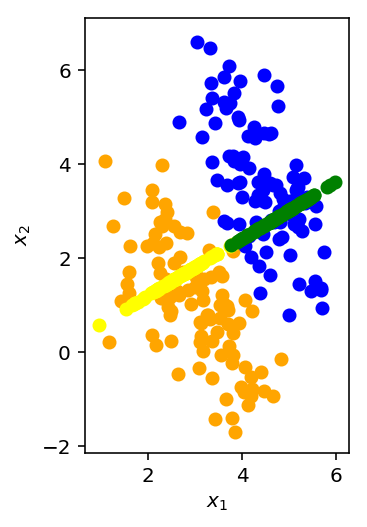

In [17]:
# (d) Compute the projection and plot the figure.

Xproj_0 = w_tilde_star.dot(w_tilde_star.T.dot(X_0)) # Shape: (2, 100).
Xproj_1 = w_tilde_star.dot(w_tilde_star.T.dot(X_1)) # Shape: (2, 100).


# Xproj_0 = np.zeros((2,100))
# Xproj_1 = np.zeros((2,100))
# for i in range(len(X_0.T)):
#     Xproj_0[0][i] = (np.dot(np.dot(w_tilde_star,X_0.T[i]),w_tilde_star))[0]
#     Xproj_0[1][i] = (np.dot(np.dot(w_tilde_star,X_0.T[i]),w_tilde_star))[1]

#     Xproj_1[0][i] = (np.dot(np.dot(w_tilde_star,X_0.T[i]),w_tilde_star))[0]
#     Xproj_1[1][i] = (np.dot(np.dot(w_tilde_star,X_0.T[i]),w_tilde_star))[1]

plt.scatter(X_0[0].tolist(), X_0[1].tolist(), color='orange')
plt.scatter(X_1[0].tolist(), X_1[1].tolist(), color='blue')
plt.scatter(Xproj_0[0].tolist(), Xproj_0[1].tolist(), color='yellow')
plt.scatter(Xproj_1[0].tolist(), Xproj_1[1].tolist(), color='green')
plt.axis('scaled')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

In [28]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import GridSearchCV
%config InlineBackend.figure_format = 'retina'

## Q5 Linear SVM

In [29]:
from sklearn.utils import shuffle

# 1) Load data.
X_and_Y = np.load('arrhythmia.npy')    # Load data from file

shuffle(X_and_Y)
X = X_and_Y[:,:279]
Y = X_and_Y[:,279]

# X_and_Y = np.matrix(shuffle(X_and_Y))   # Shuffle the data.
# X = np.matrix(X_and_Y[:,:279])   # First column to second to last column: Features (numerical values) 
# Y = np.matrix(X_and_Y[:,279])    # Last column: Labels (0 or 1)


print(X.shape, Y.shape)       # Check the shapes.


(452, 279) (452,)


__the shape of Y should be (452,) and the matrices don't need to be numpy matrices__ 

Note: [:, :279] select all 279 features and double check the shape to make sure it is a 279 - dimensional feature vector 

In [30]:
from sklearn.model_selection import train_test_split
# 2) Split the dataset into 2 parts: 
#    (a) Training set + Validation set  (80% of all data points)
#    (b) Test set                       (20% of all data points)

# Get features from test set. 
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) # Get features from train + val set. 
print(X_train_val.shape, X_test.shape, Y_train_val.shape, Y_test.shape)

(361, 279) (91, 279) (361,) (91,)


#### Original SVC Classifier I made

In [31]:
# 3) Consider linear kernel. Perform grid search for best C 
#    with 3-fold cross-validation. You can use svm.SVC() for SVM
#    classifier and use GridSearchCV() to perform such grid search.
#    For more details, please refer to the sklearn documents:
#         http://scikit-learn.org/stable/modules/svm.html
#         http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

def svc_linear_classifier(X,y,cross_val):
    C_list = [0.00001,0.0001,0.001,0.01,0.1]
    y_flat = np.ravel(Y_train_val)
    parameters = {'kernel':['linear'], 'C':C_list}
    svc = SVC(gamma='auto')
    classifier = GridSearchCV(SVC(),
                                  parameters,
                                  cv=cross_val)
    classifier.fit(X,y_flat)
    means = classifier.cv_results_['mean_test_score']
    stds = classifier.cv_results_['std_test_score']
    SVC_arr = []
    print("Best parameters set found on test set:")
    print(classifier.best_params_)
    for mean, std, params in zip(means, stds, classifier.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
        SVC_arr.append(mean)

    return np.mean(X), np.mean(y) 

#### SVC Classifier that works

In [37]:
# def SVC_classifier(X_train_val, Y_train_val): # Working
classifier = svm.SVC(kernel = 'linear')
C_list = [10**-5, 10**-4, 10**-3, 10**-2, 10**-1]
parameters = {'C': C_list}
clf = GridSearchCV(classifier, parameters, return_train_score= 'true')
clf.fit(X_train_val, Y_train_val)
print(clf.best_estimator_)
#     return clf.best_estimator_
# SVC_classifier(X_train_val,Y_train_val)

SVC(C=0.0001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


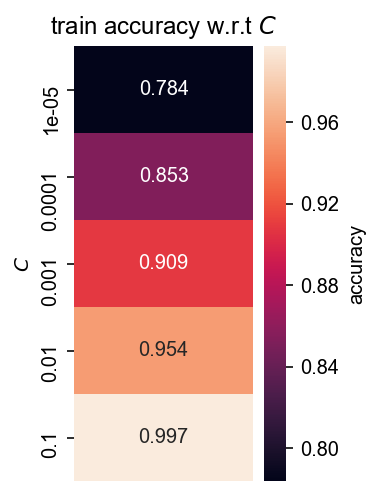

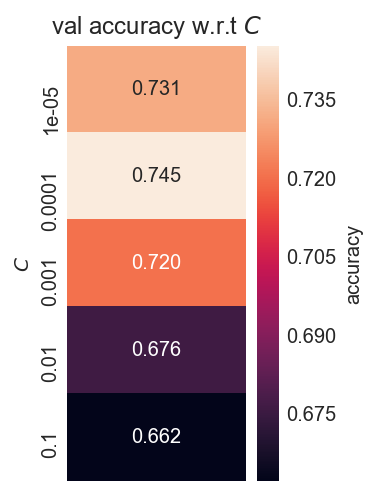

In [38]:
# 4) Draw heatmaps for result of grid search and find 
#    best C for validation set.

def draw_heatmap_linear(acc, acc_desc, C_list):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', yticklabels=C_list, xticklabels=[])
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(ylabel='$C$')
    plt.title(acc_desc + ' w.r.t $C$')
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()
    
#
# You can use the draw_heatmap_linear() to draw a heatmap to visualize 
# the accuracy w.r.t. C and gamma. Some demo code is given below as hint:
#
# demo_acc        = np.array([[0.8],
#                             [0.7]])
# demo_C_list     = [0.1, 1]
# draw_heatmap_linear(demo_acc, 'demo accuracy', demo_C_list)
#

# accuracy = [x[1] for x in classifier.grid_scores_]
# train_acc = np.array(accuracy).reshape(len(C_list))

# Gamma Values 
# accuracy_array = np.array(SVC_arr)
# train_acc = np.array([[0.8],
#                       [0.7]]) 
# draw_heatmap_linear(train_acc, 'train accuracy', C_list)

# val_acc = np.array([[0.001],
#                     [0.01],
#                     [0.1],
#                     [1.0]])
# draw_heatmap_linear(val_acc, 'val accuracy', C_list)
# C_list = [0.00001,0.0001,0.001,0.01,0.1]
# train_acc, test_acc = svc_linear_classifier(X_train_val, Y_train_val, 3)
# draw_heatmap_linear(train_acc.T, 'training accuracy', C_list)
# draw_heatmap_linear(test_acc.T, 'validatoin accuracy', C_list)
train_acc = clf.cv_results_['mean_train_score']
draw_heatmap_linear(train_acc.reshape(-1,1), 'train accuracy', C_list)

val_acc = clf.cv_results_['mean_test_score']
draw_heatmap_linear(val_acc.reshape(-1,1), 'val accuracy', C_list)

In [39]:
# 5) Use the best C to calculate the test accuracy.
optimal_classifier = svm.SVC(kernel = 'linear', C = clf.best_params_['C'] )
optimal_classifier.fit(X_train_val, Y_train_val)
test_acc = optimal_classifier.score(X_test, Y_test)
print(test_acc)

0.7692307692307693


In [40]:
# Solution 2
test_acc = clf.score(X_test, Y_test)
print(test_acc)

0.7692307692307693


## Question 6: Implement Grid Search and Cross-Validation

In [33]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.utils import shuffle

%config InlineBackend.figure_format = 'retina'

### Part 1
    1: Divide training and validation into 4 folds
    2: Train the SVM w/ RBF kernel for fold round. 
          Each round choose a subset as validation set & fold - 1 as the training set
    3: Calc Trng acc and Valid_acc every round
    4: Finally, return the avg training acc and avg valid acc over all rounds

#### Original implementation of SVC classifier without Gridsearch

In [37]:
def svc_linear_classifier(X,y,n_folds):
    C_list = [0.00001,0.0001,0.001,0.01,0.1]
    X_train_folds = []
    X_valid_folds = []
    Y_train_folds = []
    Y_valid_folds = []
    train_score = []
    valid_score = []
    y_flat = np.ravel(y)
    kf = KFold(n_splits=n_folds)     #Split train_val set
    kf.get_n_splits(X)
    # Train the SVM with RBF kernel for fold rounds 
    classiifer = SVC(C=C_list,kernel='linear',degree=n_folds)
    for train_index, valid_index in kf.split(X):
        X_train_folds.append(X[train_index])
        X_valid_folds.append(X[valid_index])
        Y_train_folds.append(y[train_index])
        Y_valid_folds.append(y[valid_index])
        # Each round choose one different subset as validation set 
        # All of the other data points (all the other fold - 1 subsets) are the training set.
        for i in range(n_folds):
            tmp_res = classiifer.fit(X_train_folds[i], X_valid_folds[i])
            valid_pred = tmp_res.predict((X_valid_folds[i]))
            valid_acc = sum(valid_pred == Y_valid_folds[i])/len(Y_valid_folds[i])
            valid_score.append(valid_acc)
        # Calculate the training accuracy and validation accuracy every round. 
        means = classifier.cv_results_['mean_test_score']
        stds = classifier.cv_results_['std_test_score']

   
    # Return the avg training accuracy & average validation accuracy over all rounds.
    return np.mean(train_score), np.mean(valid_score)

#### Correct implementation of SVC Classifier w/o gridsearch

In [41]:
def simple_cross_validation(X_train_val, Y_train_val, C, fold):
    """
    A simple cross-validation function.
    We assume the SVM with the RBF kernel.
    
    X_train_val: Features for train and val set. 
                 Shape: (num of data points, num of features)
    Y_train_val: Labels for train and val set.
                 Shape: (num of data points,)
    C:           Parameter C for SVM.
    fold:        The number of folds to do the cross-validation.
    
    Return the average accuracy on validation set.
    """
    val_acc_list = []
    train_acc_list = []
    number = len(Y_train_val)//fold
    for i in range(fold):
        X_test = X_train_val[i*number:(i+1)*number, :]
        Y_test = Y_train_val[i*number:(i+1)*number]
        X_train = np.delete(X_train_val, slice(i*number,(i+1)*number),axis = 0)
        Y_train = np.delete(Y_train_val, slice(i*number,(i+1)*number),axis = 0)
        newSVM = svm.SVC(kernel = 'linear', C=C)
        newSVM.fit(X_train,Y_train)
        train_acc = newSVM.score(X_train,Y_train)
        val_acc = newSVM.score(X_test,Y_test)
        #__________________
        val_acc_list.append(val_acc)
        train_acc_list.append(train_acc)
        
    return sum(val_acc_list) / len(val_acc_list), \
           sum(train_acc_list) / len(train_acc_list)

## Part 2: Grid Search
#### orig. Grid Search

In [38]:
# GridSearch implements both fit and transform
def grid_search(X, y, fold, C_list):
    train_acc = []
    valid_acc = []
    for c in C_list:
        train, valid = svc_linear_classifier(X, y, fold)
        train_acc.append(train)
        valid_acc.append(valid)
    train_acc = np.atleast_2d(train_acc)
    valid_acc = np.atleast_2d(valid_acc)
    return(train_acc, valid_acc)

#### working gridsearch

In [42]:
# 2) Implement the grid search function. 
def simple_GridSearchCV_fit(X_train_val, Y_train_val, C_list, fold):
    """
    A simple grid search function for C and gamma with cross-validation. 
    We assume the SVM with the RBF kernel.
    
    X_train_val: Features for train and val set. 
                 Shape: (num of data points, num of features)
    Y_train_val: Labels for train and val set.
                 Shape: (num of data points,)
    C_list:      The list of C values to try.
    fold:        The number of folds to do the cross-validation.
    
    Return the val and train accuracy matrix of cross-validation. 
    All combinations of C and gamma are
    included in the matrix. Shape: (len(C_list),1)
    """
    val_acc_matrix   = np.zeros((len(C_list),1))
    train_acc_matrix = np.zeros((len(C_list),1))
    for i in range(len(C_list)):
        val_acc_matrix[i], train_acc_matrix[i]= simple_cross_validation( \
            X_train_val, Y_train_val, C_list[i], fold)
    return val_acc_matrix, train_acc_matrix

## Part 3: Heatmap

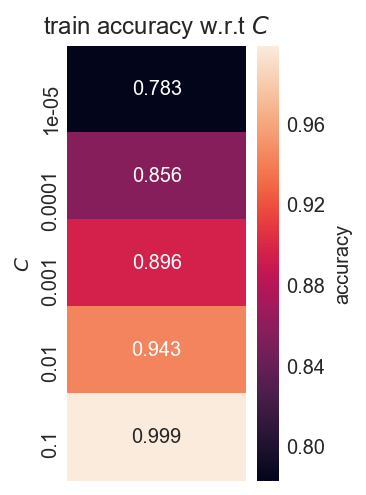

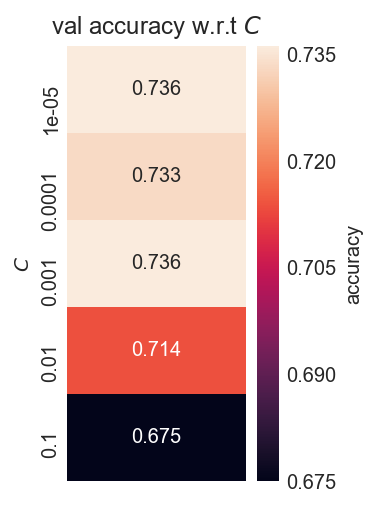

In [44]:
# C_list = [0.00001,0.0001,0.001,0.01,0.1]
# training_acc, validation_acc = grid_search(X_train_val, Y_train_val, 3, C_list)
# draw_heatmap_linear(training_acc.T, 'training accuracy', C_list)
# draw_heatmap_linear(validation_acc.T, 'validation accuracy', C_list)

# 3) Perform grid search with 3-fold cross-validation.
#    Draw heatmaps for result of grid search and find 
#    best C and gamma for validation set.
val_acc_matrix, train_acc_matrix = \
    simple_GridSearchCV_fit(X_train_val, Y_train_val, C_list, 3)

draw_heatmap_linear(train_acc_matrix, 'train accuracy', C_list)
draw_heatmap_linear(val_acc_matrix, 'val accuracy',  C_list)